## Define Imports and Determine Device

In [1]:
#!/usr/bin/env python
# coding: utf-8

# ## Define Imports and Determine Device
import os, sys
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
os.sys.path.insert(0, "source")
from DiabetesData import DiabeticData
from Autoencoder import ConvAutoencoder
from VGGAutoencoder import VGGAutoencoder
from ConvVarAutoencoder import ConvVAE
from DogCatData import DogCatData
%matplotlib inline

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
datatype="fruit"
batch_size=16
epochs = 21
model_file = "models/ConvAE_fruit_29.pth"
normalize=False
size=100

cuda


# read in data

In [3]:
if datatype == "diabetes":
    filename = "data/trainLabels_ad.csv"
    root_dir = "data/diabetes_resized"
    task = ([0],[4])
    # task = ([0,1,2], [3,4])
    # task = ([0,1,2], (3,4))
    classes = ["none", "proliferative"]
    train = pd.read_csv("data/diabetes_ad_train.csv")
    val = pd.read_csv("data/diabetes_ad_valid.csv")
    test = pd.read_csv("data/diabetes_ad_test.csv")

    print(Counter(train['level']))
    print(Counter(val['level']))
    print(Counter(test['level']))
    data = {'train': DiabeticData(df = train, transform_key="train", root_dir=root_dir, task = task, normalize = normalize),
            'valid': DiabeticData(df = val, transform_key="valid", root_dir=root_dir, task = task, normalize = normalize),
            'test': DiabeticData(df = test, transform_key="test", root_dir=root_dir, task = task, normalize = normalize)
            }


elif datatype == "dogcat":
    filename = "data/dogcat_ad.csv"
    root_dir = "data/dogcat/train"
    classes = ['dog', 'cat']
    # task = ([0,1,2], (3,4))

    train = pd.read_csv("data/dogcat_ad_train.csv")
    val = pd.read_csv("data/dogcat_ad_valid.csv")
    test = pd.read_csv("data/dogcat_ad_test.csv")
    print(Counter(train['text_label']))
    print(Counter(val['text_label']))
    print(Counter(test['text_label']))
    data = {'train': DogCatData(df = train, transform_key="train", root_dir=root_dir, normalize = normalize),
            'valid': DogCatData(df = val, transform_key="valid", root_dir=root_dir, normalize = normalize),
            'test': DogCatData(df = test, transform_key="test", root_dir=root_dir, normalize = normalize)
            }



elif datatype == "fruit":
    classes = ["apple", "banana"]
    root_dir="data/Fruit-Images-Dataset-master"
    train = pd.read_csv("data/fruit_ad_train.csv")
    val = pd.read_csv("data/fruit_ad_valid.csv")
    test = pd.read_csv("data/fruit_ad_test.csv")
    print(Counter(train['text_label']))
    print(Counter(val['text_label']))
    print(Counter(test['text_label']))
    data = {'train': DogCatData(df = train, transform_key="train", root_dir=root_dir, normalize = normalize),
            'valid': DogCatData(df = val, transform_key="valid", root_dir=root_dir, normalize = normalize),
            'test': DogCatData(df = test, transform_key="test", root_dir=root_dir, normalize = normalize)
            }

dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True),
    'valid': DataLoader(data['valid'], batch_size=batch_size, shuffle=True),
    'test': DataLoader(data['test'], batch_size=batch_size, shuffle=True)
} 

Counter({'apple': 6404})
Counter({'apple': 1073, 'lemon': 77})
Counter({'apple': 1061, 'lemon': 89})
      Unnamed: 0                                  filename  label text_label
0              0         Training/Apple Braeburn/0_100.jpg      0      apple
1              1       Training/Apple Braeburn/100_100.jpg      0      apple
2              2       Training/Apple Braeburn/101_100.jpg      0      apple
3              3       Training/Apple Braeburn/102_100.jpg      0      apple
4              4       Training/Apple Braeburn/103_100.jpg      0      apple
...          ...                                       ...    ...        ...
6399        6399  Training/Apple Red Yellow 2/r_95_100.jpg      0      apple
6400        6400  Training/Apple Red Yellow 2/r_96_100.jpg      0      apple
6401        6401  Training/Apple Red Yellow 2/r_97_100.jpg      0      apple
6402        6402  Training/Apple Red Yellow 2/r_98_100.jpg      0      apple
6403        6403   Training/Apple Red Yellow 2/r_9_1

In [4]:
#model = VGGAutoencoder(device=device, task=datatype)
model = ConvAutoencoder(device=device, task=datatype)
print(model)
if model_file != "":
    model.load_state_dict(torch.load(model_file))

model.fit(epochs, dataloaders["train"], dataloaders["valid"])


  0%|          | 0/401 [00:00<?, ?it/s]

ConvAutoencoder(
  (conv1): Conv2d(3, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(512, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 512, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(512, 3, kernel_size=(2, 2), stride=(2, 2))
  (criterion): MSELoss()
)
in fit function
Epoch: 1


/home/tntech.edu/kebrown46/miniconda3/envs/xai/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
100%|██████████| 401/401 [00:44<00:00,  9.10it/s]


Epoch: 1 	Training Loss: 0.029044


  0%|          | 1/401 [00:00<00:42,  9.41it/s]

Epoch: 2


100%|██████████| 401/401 [00:43<00:00,  9.24it/s]


Epoch: 2 	Training Loss: 0.026808


  0%|          | 1/401 [00:00<00:43,  9.30it/s]

Epoch: 3


100%|██████████| 401/401 [00:43<00:00,  9.19it/s]


Epoch: 3 	Training Loss: 0.027337


  0%|          | 1/401 [00:00<00:42,  9.38it/s]

Epoch: 4


100%|██████████| 401/401 [00:43<00:00,  9.22it/s]


Epoch: 4 	Training Loss: 0.026718


  0%|          | 1/401 [00:00<00:42,  9.43it/s]

Epoch: 5


100%|██████████| 401/401 [00:43<00:00,  9.22it/s]


Epoch: 5 	Training Loss: 0.026391


  0%|          | 1/401 [00:00<00:42,  9.44it/s]

Epoch: 6


100%|██████████| 401/401 [00:43<00:00,  9.25it/s]


Epoch: 6 	Training Loss: 0.026796


  0%|          | 1/401 [00:00<00:52,  7.60it/s]

Epoch: 7


100%|██████████| 401/401 [00:43<00:00,  9.22it/s]


Epoch: 7 	Training Loss: 0.026495


  0%|          | 1/401 [00:00<00:42,  9.31it/s]

Epoch: 8


100%|██████████| 401/401 [00:43<00:00,  9.19it/s]


Epoch: 8 	Training Loss: 0.026410


  0%|          | 1/401 [00:00<00:42,  9.35it/s]

Epoch: 9


100%|██████████| 401/401 [00:43<00:00,  9.20it/s]


Epoch: 9 	Training Loss: 0.026609


  0%|          | 1/401 [00:00<00:42,  9.31it/s]

Epoch: 10


100%|██████████| 401/401 [00:43<00:00,  9.22it/s]


Epoch: 10 	Training Loss: 0.026196


  0%|          | 1/401 [00:00<00:42,  9.34it/s]

Epoch: 11


100%|██████████| 401/401 [00:43<00:00,  9.19it/s]


Epoch: 11 	Training Loss: 0.026290


  0%|          | 1/401 [00:00<00:43,  9.28it/s]

Epoch: 12


100%|██████████| 401/401 [00:43<00:00,  9.23it/s]


Epoch: 12 	Training Loss: 0.026134


  0%|          | 1/401 [00:00<00:42,  9.36it/s]

Epoch: 13


100%|██████████| 401/401 [00:43<00:00,  9.25it/s]


Epoch: 13 	Training Loss: 0.025712


  0%|          | 1/401 [00:00<00:42,  9.38it/s]

Epoch: 14


100%|██████████| 401/401 [00:43<00:00,  9.25it/s]


Epoch: 14 	Training Loss: 0.025859


  0%|          | 1/401 [00:00<00:42,  9.35it/s]

Epoch: 15


100%|██████████| 401/401 [00:43<00:00,  9.27it/s]


Epoch: 15 	Training Loss: 0.025816


  0%|          | 1/401 [00:00<00:42,  9.37it/s]

Epoch: 16


100%|██████████| 401/401 [00:43<00:00,  9.26it/s]


Epoch: 16 	Training Loss: 0.025986


  0%|          | 1/401 [00:00<00:42,  9.45it/s]

Epoch: 17


100%|██████████| 401/401 [00:43<00:00,  9.24it/s]


Epoch: 17 	Training Loss: 0.025740


  0%|          | 1/401 [00:00<00:42,  9.47it/s]

Epoch: 18


100%|██████████| 401/401 [00:43<00:00,  9.24it/s]


Epoch: 18 	Training Loss: 0.025723


  0%|          | 1/401 [00:00<00:42,  9.40it/s]

Epoch: 19


100%|██████████| 401/401 [00:43<00:00,  9.24it/s]


Epoch: 19 	Training Loss: 0.025280


  0%|          | 1/401 [00:00<00:43,  9.27it/s]

Epoch: 20


100%|██████████| 401/401 [00:43<00:00,  9.24it/s]


Epoch: 20 	Training Loss: 0.025334


  0%|          | 1/401 [00:00<00:43,  9.22it/s]

Epoch: 21


100%|██████████| 401/401 [00:43<00:00,  9.23it/s]


Epoch: 21 	Training Loss: 0.025328


<Figure size 432x288 with 0 Axes>

/home/tntech.edu/kebrown46/miniconda3/envs/xai/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/home/tntech.edu/kebrown46/miniconda3/envs/xai/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


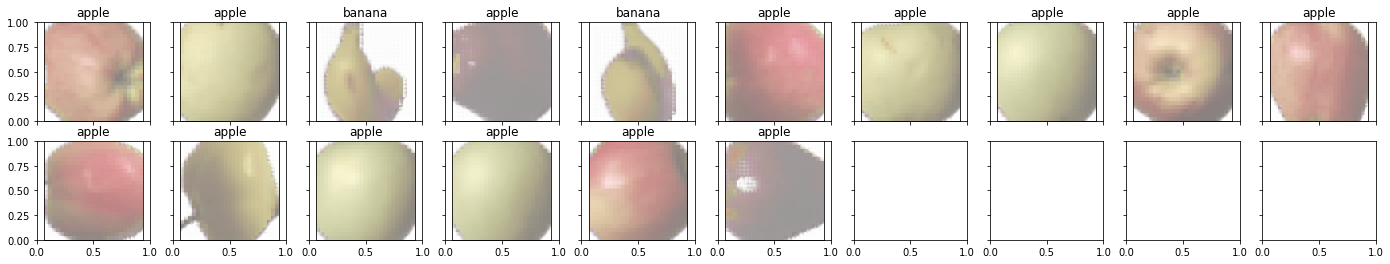

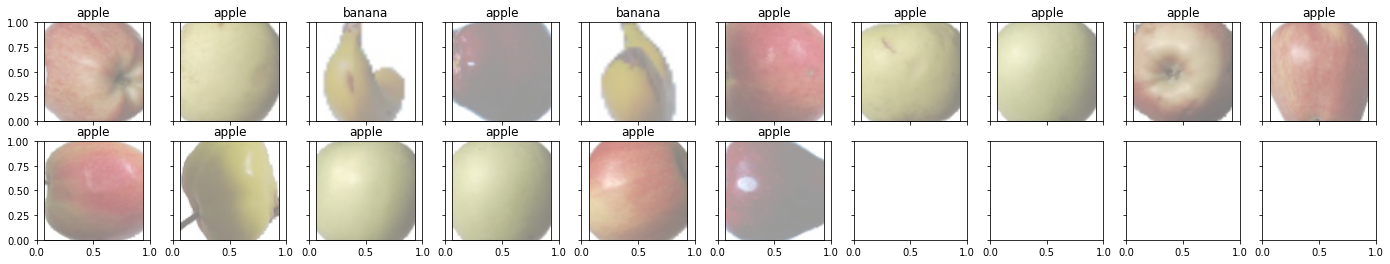

In [5]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))


# obtain one batch of test images
dataiter = iter(dataloaders["test"])
images, labels = dataiter.next()
images, labels = dataiter.next()

# get sample outputs
output = model(images.to(device))
# output = F.softmax(output)
# prep images for display
images = images.numpy()


# output is resized into a batch of iages
output = output.view(batch_size, 3, size, size)
# use detach when it's an output that requires_grad
output = output.cpu().detach().numpy()

# # plot the first ten input images and then reconstructed images
# fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(24,4))

# # input images on top row, reconstructions on bottom
# for images, row in zip([images, output], axes):
#     for img, ax in zip(images, row):
#         ax.imshow(np.squeeze(img))
#         ax.get_xaxis().set_visible(False)
#         ax.get_yaxis().set_visible(False)

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(24,4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(output[idx])
    ax.set_title(classes[labels[idx]])


# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(24,4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])


Now, we loop through the training set and calculate reconstruction loss 

In [6]:
dataloaders['valid'] = DataLoader(data['valid'], batch_size=1, shuffle=True)
dataloaders['test'] = DataLoader(data['test'], batch_size=1, shuffle=True)

results = []
results_cols = ["Image Label", "Reconstruction Loss"]
for x, y in dataloaders['valid']:
    X = x.to(device)
    output = model(X)
    output = output.cpu().detach().numpy()
    for i in range(y.shape[0]):
        ls = 0
        image = x[i].numpy()
        ouptut = output[i]
        label = y[i].numpy()
        ls = np.sum(np.square(image.ravel() - output.ravel()))
        # ls = model.criterion(output, image)
        results.append([label, ls])

results = pd.DataFrame(results, columns=results_cols)
results.to_csv("reconstruction_error.csv")


#find error threshold on validation set



#evaluate on testing data

     Image Label  Reconstruction Loss
0              0           101.675888
1              0            24.129768
2              0            20.022322
3              0            45.189255
4              0            23.597488
...          ...                  ...
1145           0            60.804489
1146           0           120.503334
1147           0            21.054277
1148           0            25.211473
1149           0            95.555298

[1150 rows x 2 columns]
     Image Label  Reconstruction Loss
0              0           101.675888
1              0            24.129768
2              0            20.022322
3              0            45.189255
4              0            23.597488
...          ...                  ...
1145           0            60.804489
1146           0           120.503334
1147           0            21.054277
1148           0            25.211473
1149           0            95.555298

[1073 rows x 2 columns]
     Image Label  Reconstruction Loss


Text(0, 0.5, 'Frequency')

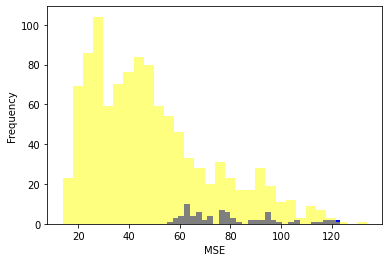

In [7]:
print(results)
label_1 = results[results["Image Label"] == 1]
label_0 = results[results["Image Label"] == 0]
print(label_0)
print(label_1)
avg_1 = np.mean(label_1['Reconstruction Loss'].values)
avg_0 = np.mean(label_0['Reconstruction Loss'].values)

print("Average Reconstruction Error (Prediction = 0)", avg_0)
print("Average Reconstruction Error (Prediction = 1)", avg_1)

plt.hist(label_1['Reconstruction Loss'].values, density=False, bins=30, color='blue')
plt.hist(label_0['Reconstruction Loss'].values, density=False, bins=30, alpha = 0.5,color='yellow')
plt.xlabel('MSE')
plt.ylabel('Frequency')


In [10]:
threshold = 80
y_true = []
y_pred = []
for x, y in dataloaders['test']:
    X = x.to(device)
    output = model(X)
    output = output.cpu().detach().numpy()
    for i in range(y.shape[0]):
        ls = 0
        image = x[i].numpy()
        ouptut = output[i]
        label = y[i].numpy()
        ls = np.sum(np.square(image.ravel() - output.ravel()))
        print("Label: {0}\tReconstruction Loss: {1}\tPrediction: {2}".format(label,ls,int(ls >= threshold)))
        y_true.append(label)
        if ls >= threshold:
            y_pred.append(1)
        else:
            y_pred.append(0)

print(y_true)
print(y_pred)

Label: 0	Reconstruction Loss: 46.19734191894531	Prediction: 0
Label: 1	Reconstruction Loss: 73.11953735351562	Prediction: 0
Label: 0	Reconstruction Loss: 28.3970947265625	Prediction: 0
Label: 0	Reconstruction Loss: 20.344417572021484	Prediction: 0
Label: 0	Reconstruction Loss: 24.7207088470459	Prediction: 0
Label: 0	Reconstruction Loss: 76.61331939697266	Prediction: 0
Label: 0	Reconstruction Loss: 93.36540985107422	Prediction: 1
Label: 0	Reconstruction Loss: 42.941890716552734	Prediction: 0
Label: 0	Reconstruction Loss: 31.261131286621094	Prediction: 0
Label: 0	Reconstruction Loss: 21.13282012939453	Prediction: 0
Label: 1	Reconstruction Loss: 94.96488952636719	Prediction: 1
Label: 0	Reconstruction Loss: 96.09386444091797	Prediction: 1
Label: 0	Reconstruction Loss: 30.169174194335938	Prediction: 0
Label: 0	Reconstruction Loss: 28.05742073059082	Prediction: 0
Label: 0	Reconstruction Loss: 33.493507385253906	Prediction: 0
Label: 0	Reconstruction Loss: 94.89619445800781	Prediction: 1
Label

Label: 0	Reconstruction Loss: 105.2022933959961	Prediction: 1
Label: 0	Reconstruction Loss: 69.03541564941406	Prediction: 0
Label: 0	Reconstruction Loss: 14.774791717529297	Prediction: 0
Label: 0	Reconstruction Loss: 22.019668579101562	Prediction: 0
Label: 0	Reconstruction Loss: 41.344749450683594	Prediction: 0
Label: 0	Reconstruction Loss: 36.67876052856445	Prediction: 0
Label: 1	Reconstruction Loss: 125.83206176757812	Prediction: 1
Label: 0	Reconstruction Loss: 48.070953369140625	Prediction: 0
Label: 1	Reconstruction Loss: 111.49382781982422	Prediction: 1
Label: 1	Reconstruction Loss: 75.96902465820312	Prediction: 0
Label: 0	Reconstruction Loss: 22.530378341674805	Prediction: 0
Label: 1	Reconstruction Loss: 71.44746398925781	Prediction: 0
Label: 0	Reconstruction Loss: 67.87438201904297	Prediction: 0
Label: 0	Reconstruction Loss: 43.0264892578125	Prediction: 0
Label: 0	Reconstruction Loss: 42.14512634277344	Prediction: 0
Label: 1	Reconstruction Loss: 123.66816711425781	Prediction: 1
L

Label: 0	Reconstruction Loss: 50.594276428222656	Prediction: 0
Label: 1	Reconstruction Loss: 79.16410827636719	Prediction: 0
Label: 0	Reconstruction Loss: 21.2914981842041	Prediction: 0
Label: 0	Reconstruction Loss: 68.90859985351562	Prediction: 0
Label: 0	Reconstruction Loss: 24.31925392150879	Prediction: 0
Label: 1	Reconstruction Loss: 77.51456451416016	Prediction: 0
Label: 1	Reconstruction Loss: 135.66415405273438	Prediction: 1
Label: 0	Reconstruction Loss: 26.112285614013672	Prediction: 0
Label: 0	Reconstruction Loss: 22.333324432373047	Prediction: 0
Label: 0	Reconstruction Loss: 23.341514587402344	Prediction: 0
Label: 0	Reconstruction Loss: 85.61209106445312	Prediction: 1
Label: 0	Reconstruction Loss: 44.05355453491211	Prediction: 0
Label: 1	Reconstruction Loss: 103.64425659179688	Prediction: 1
Label: 0	Reconstruction Loss: 78.93009185791016	Prediction: 0
Label: 0	Reconstruction Loss: 32.36790466308594	Prediction: 0
Label: 0	Reconstruction Loss: 39.725215911865234	Prediction: 0
La

Label: 0	Reconstruction Loss: 54.78726577758789	Prediction: 0
Label: 0	Reconstruction Loss: 49.315059661865234	Prediction: 0
Label: 0	Reconstruction Loss: 21.254592895507812	Prediction: 0
Label: 0	Reconstruction Loss: 40.38188934326172	Prediction: 0
Label: 1	Reconstruction Loss: 77.11930847167969	Prediction: 0
Label: 0	Reconstruction Loss: 101.24536895751953	Prediction: 1
Label: 0	Reconstruction Loss: 35.637359619140625	Prediction: 0
Label: 1	Reconstruction Loss: 75.33512878417969	Prediction: 0
Label: 0	Reconstruction Loss: 33.61468505859375	Prediction: 0
Label: 0	Reconstruction Loss: 69.83407592773438	Prediction: 0
Label: 0	Reconstruction Loss: 43.268760681152344	Prediction: 0
Label: 0	Reconstruction Loss: 66.63691711425781	Prediction: 0
Label: 0	Reconstruction Loss: 65.41294860839844	Prediction: 0
Label: 0	Reconstruction Loss: 34.59783172607422	Prediction: 0
Label: 0	Reconstruction Loss: 22.124679565429688	Prediction: 0
Label: 0	Reconstruction Loss: 79.30670166015625	Prediction: 0
La

Label: 0	Reconstruction Loss: 39.17870330810547	Prediction: 0
Label: 0	Reconstruction Loss: 60.21391296386719	Prediction: 0
Label: 0	Reconstruction Loss: 66.7010726928711	Prediction: 0
Label: 0	Reconstruction Loss: 46.43021774291992	Prediction: 0
Label: 0	Reconstruction Loss: 24.978288650512695	Prediction: 0
Label: 0	Reconstruction Loss: 45.66979217529297	Prediction: 0
Label: 0	Reconstruction Loss: 85.28206634521484	Prediction: 1
Label: 0	Reconstruction Loss: 23.91444206237793	Prediction: 0
Label: 0	Reconstruction Loss: 86.6989517211914	Prediction: 1
Label: 0	Reconstruction Loss: 61.52555465698242	Prediction: 0
Label: 0	Reconstruction Loss: 98.6431655883789	Prediction: 1
Label: 0	Reconstruction Loss: 42.613739013671875	Prediction: 0
Label: 0	Reconstruction Loss: 70.11134338378906	Prediction: 0
Label: 0	Reconstruction Loss: 54.821868896484375	Prediction: 0
Label: 0	Reconstruction Loss: 24.065526962280273	Prediction: 0
Label: 0	Reconstruction Loss: 66.05120849609375	Prediction: 0
Label: 

Label: 0	Reconstruction Loss: 52.969024658203125	Prediction: 0
Label: 0	Reconstruction Loss: 54.537933349609375	Prediction: 0
Label: 0	Reconstruction Loss: 17.494874954223633	Prediction: 0
Label: 0	Reconstruction Loss: 75.90251159667969	Prediction: 0
Label: 0	Reconstruction Loss: 70.63710021972656	Prediction: 0
Label: 0	Reconstruction Loss: 70.62969207763672	Prediction: 0
Label: 0	Reconstruction Loss: 102.04910278320312	Prediction: 1
Label: 0	Reconstruction Loss: 54.04609298706055	Prediction: 0
Label: 1	Reconstruction Loss: 65.14007568359375	Prediction: 0
Label: 0	Reconstruction Loss: 41.21864318847656	Prediction: 0
Label: 1	Reconstruction Loss: 73.83927154541016	Prediction: 0
Label: 0	Reconstruction Loss: 70.65806579589844	Prediction: 0
Label: 1	Reconstruction Loss: 69.59881591796875	Prediction: 0
Label: 0	Reconstruction Loss: 69.5033950805664	Prediction: 0
Label: 0	Reconstruction Loss: 21.345623016357422	Prediction: 0
Label: 0	Reconstruction Loss: 21.66521644592285	Prediction: 0
Labe

Label: 0	Reconstruction Loss: 48.8511962890625	Prediction: 0
Label: 0	Reconstruction Loss: 20.847759246826172	Prediction: 0
Label: 0	Reconstruction Loss: 40.479312896728516	Prediction: 0
Label: 1	Reconstruction Loss: 80.25798797607422	Prediction: 1
Label: 0	Reconstruction Loss: 113.35638427734375	Prediction: 1
Label: 0	Reconstruction Loss: 63.11126708984375	Prediction: 0
Label: 0	Reconstruction Loss: 83.18623352050781	Prediction: 1
Label: 0	Reconstruction Loss: 32.82655334472656	Prediction: 0
Label: 0	Reconstruction Loss: 54.87909698486328	Prediction: 0
Label: 0	Reconstruction Loss: 121.20597839355469	Prediction: 1
Label: 0	Reconstruction Loss: 101.84361267089844	Prediction: 1
Label: 1	Reconstruction Loss: 69.1985092163086	Prediction: 0
Label: 0	Reconstruction Loss: 21.246793746948242	Prediction: 0
Label: 0	Reconstruction Loss: 14.17294692993164	Prediction: 0
Label: 0	Reconstruction Loss: 44.902191162109375	Prediction: 0
Label: 0	Reconstruction Loss: 41.70924758911133	Prediction: 0
Lab

Label: 0	Reconstruction Loss: 30.93448257446289	Prediction: 0
Label: 0	Reconstruction Loss: 30.638944625854492	Prediction: 0
Label: 0	Reconstruction Loss: 83.61540222167969	Prediction: 1
Label: 0	Reconstruction Loss: 22.38467025756836	Prediction: 0
Label: 0	Reconstruction Loss: 30.4359130859375	Prediction: 0
Label: 1	Reconstruction Loss: 95.19639587402344	Prediction: 1
Label: 0	Reconstruction Loss: 66.5335464477539	Prediction: 0
Label: 0	Reconstruction Loss: 24.54826545715332	Prediction: 0
Label: 1	Reconstruction Loss: 110.91007995605469	Prediction: 1
Label: 0	Reconstruction Loss: 71.84246826171875	Prediction: 0
Label: 0	Reconstruction Loss: 45.372779846191406	Prediction: 0
Label: 0	Reconstruction Loss: 41.42498779296875	Prediction: 0
Label: 0	Reconstruction Loss: 36.55628204345703	Prediction: 0
Label: 0	Reconstruction Loss: 26.513437271118164	Prediction: 0
Label: 0	Reconstruction Loss: 59.88640213012695	Prediction: 0
Label: 0	Reconstruction Loss: 48.91895294189453	Prediction: 0
Label:

In [11]:
accuracy = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
print("Accuracy: ", accuracy)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1-Score: ", f1)
print("Confusion Matrix: ", cm)

Accuracy:  0.8356521739130435
Precision:  0.2159090909090909
Recall:  0.42696629213483145
F1-Score:  0.2867924528301887
Confusion Matrix:  [[923 138]
 [ 51  38]]
